<a href="https://colab.research.google.com/github/elias-ba/one-health-ai-training/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Health Data Analytics Capacity Program - Introduction to AI modeling

Author: [Elias W. BA](https://github.com/elias-ba)

Date: October, 2nd 2024

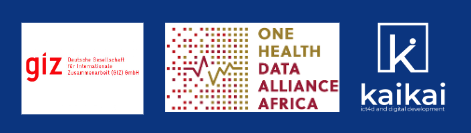

## Step 1: Exploratory Data Analysis (EDA)

### 1.1 Load the Data and Libraries
Let’s start by loading the dataset and necessary libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("enhanced_synthetic_one_health_data.csv")

# Display basic info and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       100000 non-null  object 
 1   temperature                100000 non-null  float64
 2   humidity                   100000 non-null  float64
 3   rainfall                   100000 non-null  float64
 4   air_quality_index          100000 non-null  int64  
 5   healthcare_access_index    100000 non-null  float64
 6   vaccination_coverage       100000 non-null  float64
 7   season                     100000 non-null  object 
 8   population_density         100000 non-null  float64
 9   animal_population_density  100000 non-null  float64
 10  nearby_livestock_count     100000 non-null  float64
 11  age_group_proportion       100000 non-null  float64
 12  sanitation_score           100000 non-null  float64
 13  vector_density             100

### 1.2 Summary Statistics and Missing Values Check
Check for any missing values and view summary statistics for each column.

In [4]:
# Check for missing values
print(data.isnull().sum())

# View summary statistics
print(data.describe())

date                         0
temperature                  0
humidity                     0
rainfall                     0
air_quality_index            0
healthcare_access_index      0
vaccination_coverage         0
season                       0
population_density           0
animal_population_density    0
nearby_livestock_count       0
age_group_proportion         0
sanitation_score             0
vector_density               0
proximity_to_water           0
income_level                 0
health_expenditure           0
disease_cases                0
dtype: int64
         temperature       humidity       rainfall  air_quality_index  \
count  100000.000000  100000.000000  100000.000000      100000.000000   
mean       30.004834      70.009810       4.996983          99.479350   
std         5.004530       9.989393       1.999705          28.847231   
min         7.671981      26.259572      -3.827772          50.000000   
25%        26.627531      63.263152       3.651606          75.0

### 1.3 Visualize Relationships
Let’s explore key relationships visually to understand how some variables correlate with disease cases.

*   Temperature vs. Disease Cases
*   Humidity vs. Disease Cases
*   Animal Population Density vs. Disease Cases
*   Vector Density vs. Disease Cases

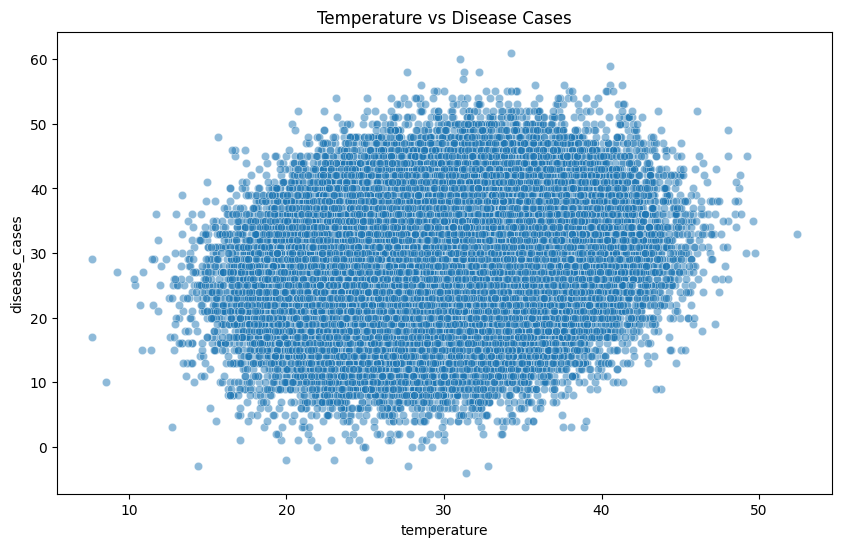

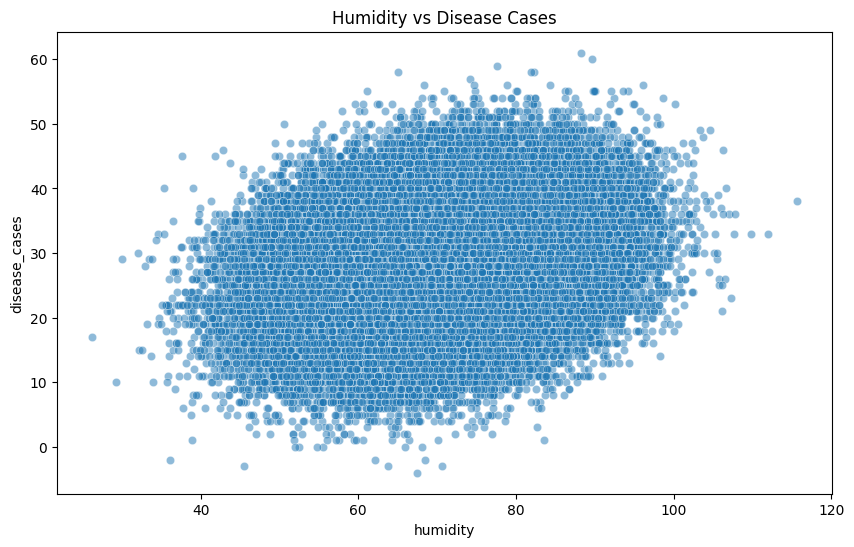

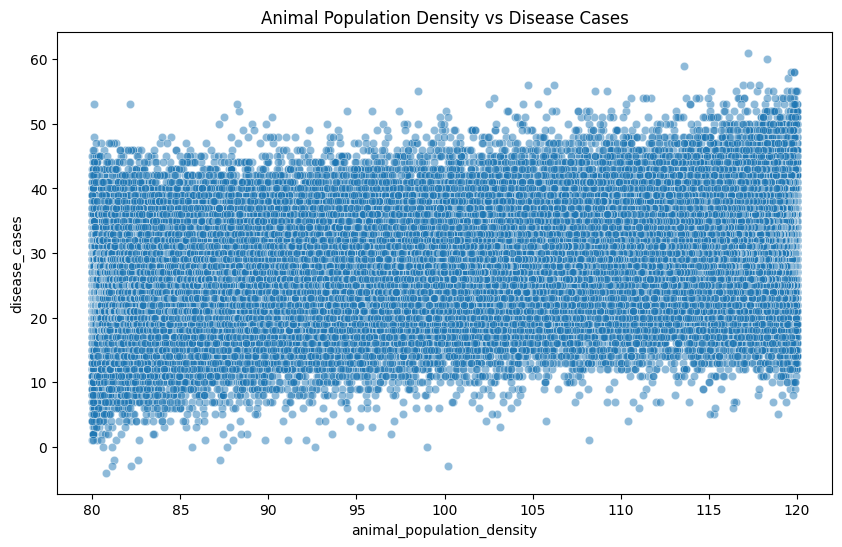

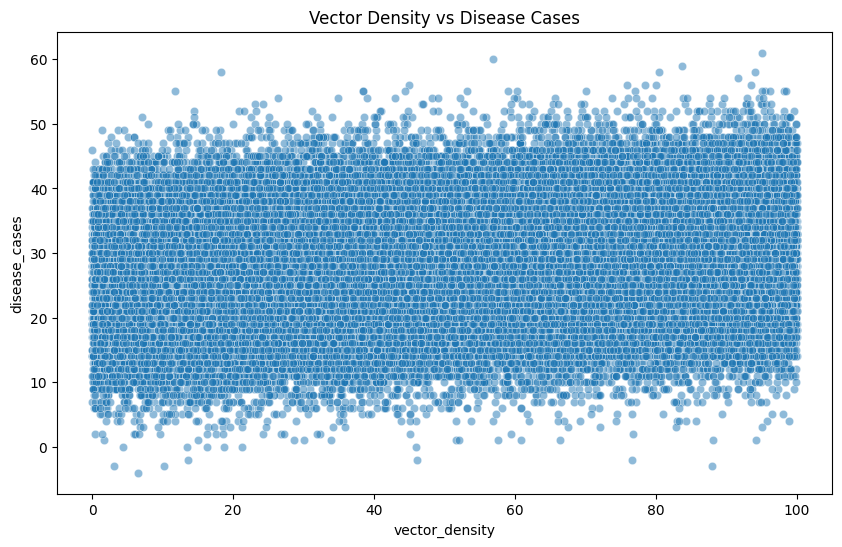

In [5]:
# Visualizing Temperature vs Disease Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="temperature", y="disease_cases", alpha=0.5)
plt.title("Temperature vs Disease Cases")
plt.show()

# Visualizing Humidity vs Disease Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="humidity", y="disease_cases", alpha=0.5)
plt.title("Humidity vs Disease Cases")
plt.show()

# Visualizing Animal Population Density vs Disease Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="animal_population_density", y="disease_cases", alpha=0.5)
plt.title("Animal Population Density vs Disease Cases")
plt.show()

# Visualizing Vector Density vs Disease Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="vector_density", y="disease_cases", alpha=0.5)
plt.title("Vector Density vs Disease Cases")
plt.show()

### 1.4 Correlation Matrix
A correlation matrix can help identify the strength of linear relationships between the features and disease cases.

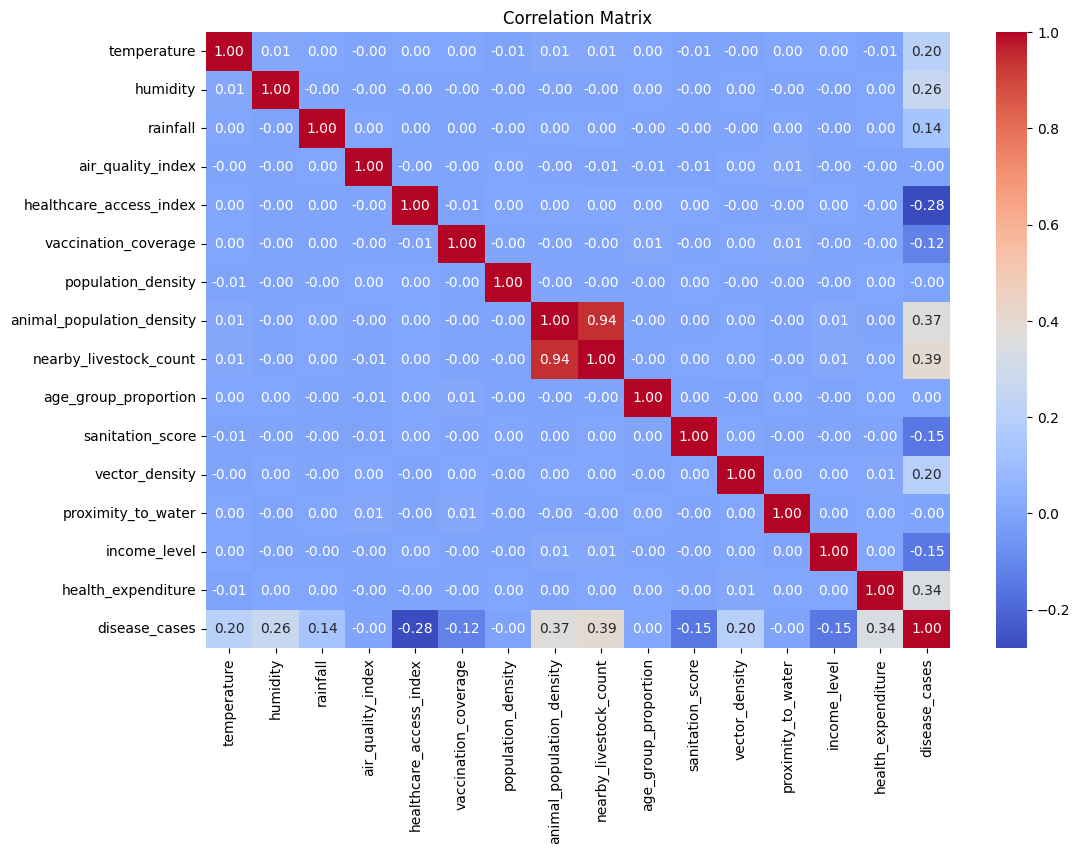

In [6]:
# Drop the 'date' column before calculating the correlation matrix
data_numeric = data.drop(columns=["date", "season"])  # Dropping 'season' if it's categorical

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Step 2: Build a Predictive Model
Now, we’ll build a predictive model using **Linear Regression** to estimate disease cases based on the dataset’s features. We’ll start by splitting the data into training and testing sets.

### 2.1 Split Data into Features and Target

In [7]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[[
    "temperature", "humidity", "rainfall", "air_quality_index",
    "population_density", "animal_population_density",
    "vector_density", "proximity_to_water", "sanitation_score"
]]
y = data["disease_cases"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2.2 Train the Model
We’ll use Linear Regression for simplicity, but you could also try more complex models like Decision Trees or Random Forests for comparison.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 39.89601981780356
R-squared: 0.32164382267022473


## Step 3: Factor Importance Analysis
To understand which factors contribute most to disease cases, we can check the coefficients of the linear regression model.

In [9]:
# Feature importance for linear regression
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


                     Feature  Importance
2                   rainfall    0.520904
0                temperature    0.298355
1                   humidity    0.200800
5  animal_population_density    0.200149
7         proximity_to_water    0.118753
6             vector_density    0.051568
3          air_quality_index   -0.000647
4         population_density   -0.000981
8           sanitation_score   -0.398102


Plotting the feature importance will make it easier to interpret visually.

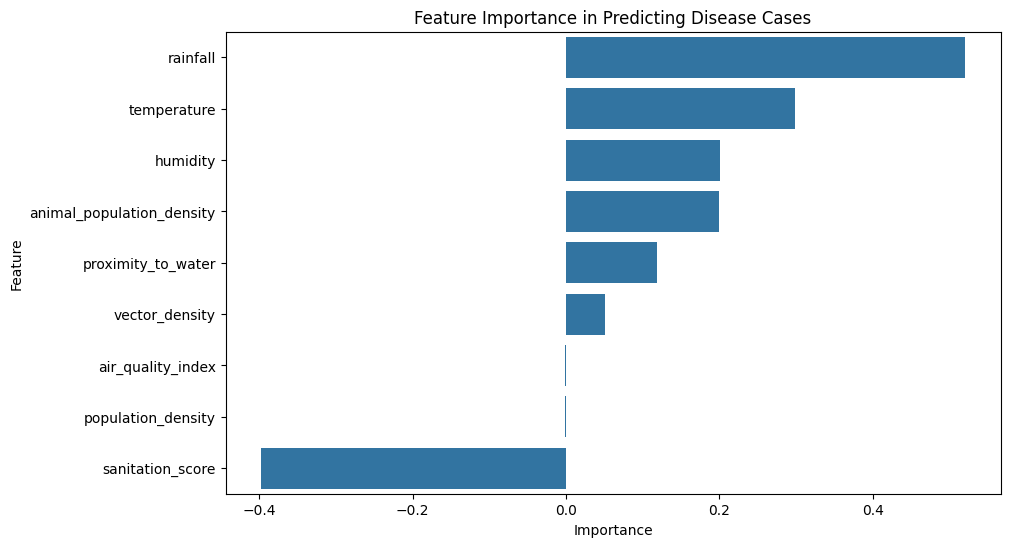

In [10]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance in Predicting Disease Cases")
plt.show()


## Step 4: Insights and Interpretation
### 4.1 Key Insights
* **Top Factors**: Identify the most influential factors based on feature importance. For example, if temperature, vector density, and humidity rank highly, these could be primary drivers of disease outbreaks.
* **Model Performance**: Evaluate if the R-squared and MSE values indicate a good fit. A high R-squared (closer to 1) suggests the model explains a large proportion of the variance in disease cases.

### 4.2 Practical Applications
* **Early Warning System**: High-risk periods (e.g., high vector density and temperature) can be flagged as likely outbreak times.
* **Resource Allocation**: Focus public health resources (e.g., vector control, vaccination) in areas and seasons where the model predicts higher disease cases.